In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

def normalize(X):
    return X / 255.

def init_params(n_input, n_hidden, n_output):
    W1 = np.random.randn(n_hidden, n_input) * np.sqrt(2. / n_input)
    b1 = np.zeros((n_hidden, 1))
    W2 = np.random.randn(n_output, n_hidden) * np.sqrt(2. / n_hidden)
    b2 = np.zeros((n_output, 1))
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    exp_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return exp_Z / np.sum(exp_Z, axis=0, keepdims=True)

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def deriv_ReLU(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def back_prop(Z1, A1, Z2, A2, W2, X, Y):
    one_hot_Y = one_hot(Y)
    m = X.shape[1]
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims=True)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2  

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha, n_hidden_units):
    n_input = X.shape[0]
    n_output = len(np.unique(Y))
    W1, b1, W2, b2 = init_params(n_input, n_hidden_units, n_output)
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Accuracy: ", get_accuracy(predictions, Y))
    return W1, b1, W2, b2

data = pd.read_csv('Character_TrainData.csv')
data.sort_values('label')
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_train = data.T
X_train = data_train[1:n]
Y_train = data_train[0]
X_train = normalize(X_train)
_, m_train = X_train.shape

hidden_units = 100
learning_rate = 0.01
iterations = 80000




In [32]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, iterations, learning_rate, hidden_units)

Iteration:  0
[6 6 6 ... 6 6 6] [5 5 0 ... 0 5 0]
Accuracy:  0.102
Iteration:  10
[9 5 6 ... 1 4 6] [5 5 0 ... 0 5 0]
Accuracy:  0.121625
Iteration:  20
[9 5 6 ... 1 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.129125
Iteration:  30
[9 5 6 ... 1 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.13625
Iteration:  40
[9 5 6 ... 0 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.141875
Iteration:  50
[9 5 6 ... 0 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.147
Iteration:  60
[9 5 6 ... 0 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.151125
Iteration:  70
[9 5 6 ... 0 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.154375
Iteration:  80
[9 5 6 ... 0 1 6] [5 5 0 ... 0 5 0]
Accuracy:  0.156625
Iteration:  90
[9 5 6 ... 0 4 6] [5 5 0 ... 0 5 0]
Accuracy:  0.1585
Iteration:  100
[9 5 1 ... 0 4 6] [5 5 0 ... 0 5 0]
Accuracy:  0.161
Iteration:  110
[9 5 1 ... 0 4 6] [5 5 0 ... 0 5 0]
Accuracy:  0.16425
Iteration:  120
[9 5 1 ... 0 4 6] [5 5 0 ... 0 5 0]
Accuracy:  0.1675
Iteration:  130
[9 5 1 ... 0 4 6] [5 5 0 ... 0 5 0]
Accuracy:  0.17
Iteration:  140
[9 5 1

In [33]:
data_test = pd.read_csv('Character_TestData.csv')
data_test = np.array(data_test)
np.random.shuffle(data_test)
data_test = data_test.T
j, k = data_test.shape
print (j,k)
Y_test = data_test[0]
X_test = data_test[1:k]
X_test = X_test / 255.


def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    map = {
        0: 'bart simpson',
        1: 'charles montgomery_burns',
        2: 'homer simpson',
        3: 'krusty the clown',
        4: 'lisa simpson',
        5: 'marge simpson',
        6: 'milhouse van houten',
        7: 'moe szyslak',
        8: 'ned flanders',
        9: 'principal skinner'
    }
    
    current_image = X_test[:, index, None]
    prediction = make_predictions(X_test[:, index, None], W1, b1, W2, b2)
    label = Y_test[index]
    print("Prediction: ", map[prediction[0]])
    print("Label: ", map[label])
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

data_test

785 2000


array([[  6,   8,   0, ...,   2,   0,   5],
       [233, 112, 128, ..., 118, 122, 123],
       [229, 111, 195, ..., 118, 119, 120],
       ...,
       [216,  99, 253, ..., 211, 201, 118],
       [203,  94, 236, ..., 211, 202, 140],
       [178,  98, 236, ..., 211, 203,  90]], dtype=int64)

Prediction:  milhouse van houten
Label:  milhouse van houten


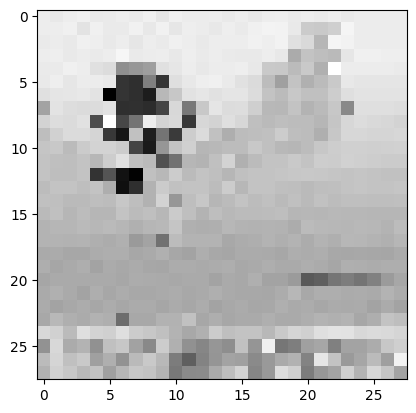

Prediction:  marge simpson
Label:  ned flanders


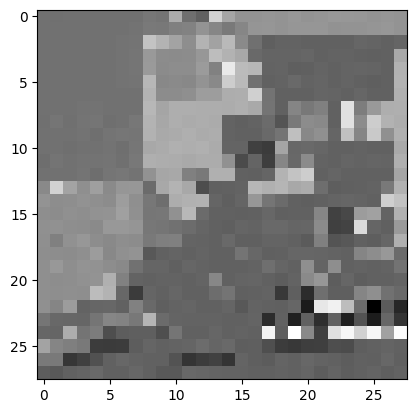

Prediction:  bart simpson
Label:  bart simpson


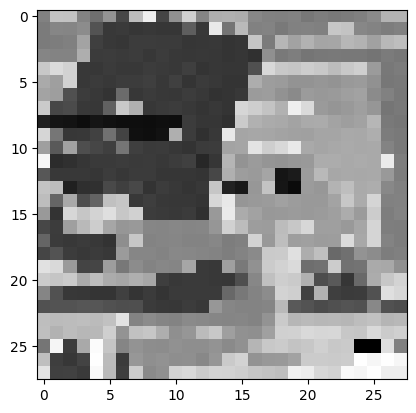

Prediction:  krusty the clown
Label:  krusty the clown


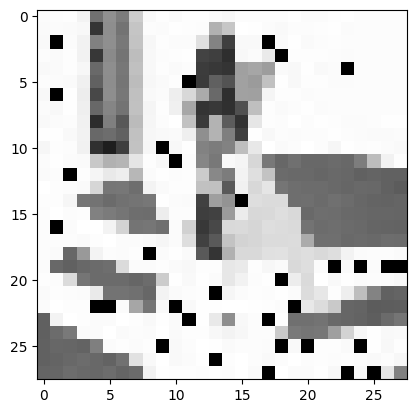

Prediction:  milhouse van houten
Label:  milhouse van houten


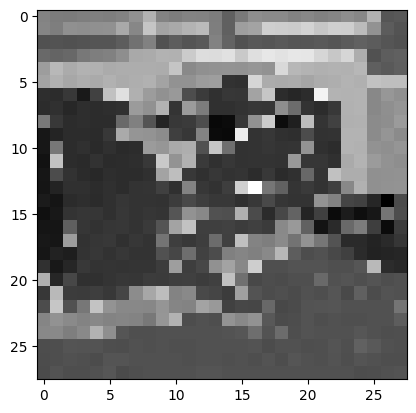

In [39]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(781, W1, b1, W2, b2)
test_prediction(784, W1, b1, W2, b2)

In [35]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
accuracy = get_accuracy(test_predictions, Y_test)

[6 5 0 ... 2 1 5] [6 8 0 ... 2 0 5]


In [36]:
print("Accuracy: ",accuracy)

Accuracy:  0.384
